This project is about analyzing the Netflix dataset from a consumer, producer, and analyst's point of view.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving netflixData.csv to netflixData.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['netflixData.csv']))


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

Part 1: Understanding the Dataset

In [ ]:
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [ ]:
df.shape

(5967, 13)

In [ ]:
df[df['Title'].isin(['2 States'])]


,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
32,79afe5bd-0dcd-4cac-9072-f77f46f355ef,2 States,Graduate students Krish and Ananya hope to win...,Abhishek Varman,"Comedies, Dramas, International Movies","Alia Bhatt, Arjun Kapoor, Ronit Roy, Amrita Si...",India,2014.0,TV-PG,143 min,7.0/10,Movie,"August 4, 2018"


Part 2: Methods for Consumers to Navigate Netflix

In [ ]:
def find_director(name):
  for item in df['Director']:
    if(item == name):
      return True 
  return False
  


In [ ]:
expected = True
observed = find_director("Hao Wu")
assert observed == expected, f"\nYou returned:\n    {observed!r}\ninstead of:\n    {expected!r}"

expected = True
observed = find_director("Karan Johar")
assert observed == expected, f"\nYou returned:\n    {observed!r}\ninstead of:\n    {expected!r}"

# should return false because I am not a director
expected = False
observed = find_director("Shreeya Chugh")
assert observed == expected, f"\nYou returned:\n    {observed!r}\ninstead of:\n    {expected!r}"

In [ ]:
def find_content(name):
  for item in df['Title']:
    if(item == name):
      return True 
  return False

In [ ]:
def highest_producing_country():
  return df['Production Country'].value_counts().head(1)



In [ ]:
df.shape

(5967, 13)

In [ ]:
def topK_highest_producing_country(k):
  if k<=0:
    print("cannot be a negative value")
  elif k>= 5967:
    print("k cannot be more than number of rows")
  else:
    return df['Production Country'].value_counts().head(k)

In [ ]:
def return_rating_of_content(content):
  return df['Imdb Score'][df['Title'][df['Title']== content].index]

In [ ]:
df['Imdb Score'][df['Title'][df['Title']== "The Blazing Sun"].index]

4666    7.3/10
Name: Imdb Score, dtype: object

Part 3: Understanding Audience and Production Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


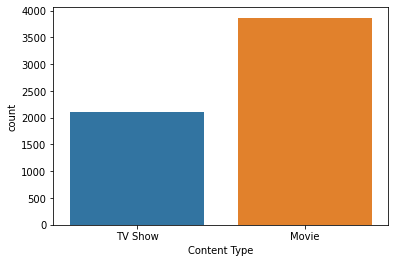

In [ ]:
df.groupby('Content Type')
sns.countplot(df['Content Type'])

In [ ]:

df.sort_values(by ='Release Date')
    

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
3706,8a6d8125-7c0f-4ec0-85dd-e1c4fdaaa380,Pioneers: First Women Filmmakers*,This collection restores films from women who ...,NaN,TV Shows,NaN,NaN,1925.0,TV-14,1 Season,NaN,TV Show,NaN
1649,95315fd3-1598-4773-95eb-2fc85d733b91,Five Came Back: The Reference Films,This collection includes 12 World War II-era p...,NaN,TV Shows,NaN,United States,1945.0,TV-MA,1 Season,8.3/10,TV Show,NaN
4666,407c166b-803b-4476-a387-18827af178a9,The Blazing Sun,Competition between sugar cane producers turns...,Youssef Chahine,"Classic Movies, Dramas, International Movies","Omar Sharif, Faten Hamama, Zaki Rostom, Farid ...",Egypt,1954.0,TV-14,116 min,7.3/10,Movie,"June 18, 2020"
5810,04e23065-2c9d-44af-ab6a-6c330d2846b8,White Christmas,Two war buddies fall for two sisters and follo...,Michael Curtiz,"Children & Family Movies, Classic Movies, Come...","Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",United States,1954.0,TV-G,120 min,7.5/10,Movie,"November 15, 2020"
1198,bd284cfe-8073-4fb0-9e65-2b5f35ff5a4d,Dark Waters,A fisherman returns home after a three-year ab...,Youssef Chahine,"Classic Movies, Dramas, International Movies","Faten Hamama, Omar Sharif, Ahmed Ramzy, Hussei...",Egypt,1956.0,TV-14,104 min,6.7/10,Movie,"June 18, 2020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,88bf755b-6a87-41f4-b353-5f9066108c70,Dance of the Forty One,A gay congressman marries the Mexican presiden...,David Pablos,"Dramas, Independent Movies, International Movies","Alfonso Herrera, Emiliano Zurita, Mabel Cadena...","Mexico, Brazil",2021.0,TV-MA,99 min,6.7/10,Movie,"May 12, 2021"
2838,2cb1e0a3-c2b1-41ac-b664-f742adfe3137,"Love, Death & Robots","Terrifying creatures, wicked surprises and dar...",NaN,"TV Action & Adventure, TV Horror, TV Sci-Fi & ...","Topher Grace, Mary Elizabeth Winstead, Gary Co...",United States,2021.0,TV-MA,2 Seasons,8.6/10,TV Show,"May 14, 2021"
2790,8d2c9141-8232-4d3d-b68e-f65a6aff2b54,Louis C.K. 2017,"Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,Movies,Louis C.K.,United States,NaN,NaN,NaN,NaN,TV Show,NaN
2791,17fd533b-799e-4d68-8af5-03ba8c14da0a,Louis C.K.: Hilarious,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,Movies,Louis C.K.,United States,NaN,NaN,NaN,NaN,TV Show,NaN


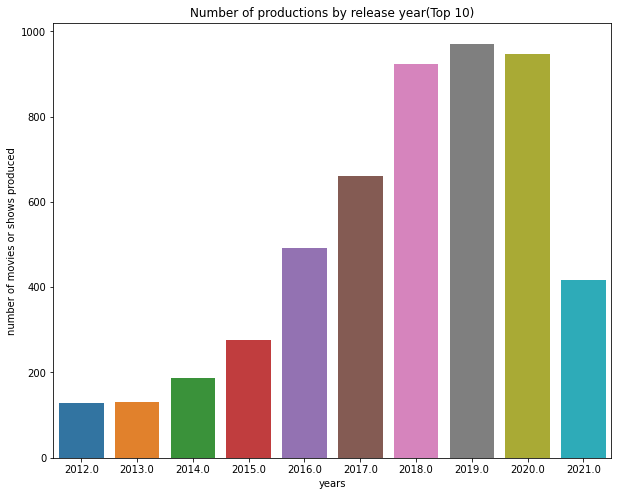

In [ ]:
year = df['Release Date'].value_counts().head(10)
plt.figure(figsize = (10,8))
plt.title('Number of productions by release year(Top 10)')
plt.xlabel('years')
plt.ylabel('number of movies or shows produced')
sns.barplot(x = year.index, y =  year.values )

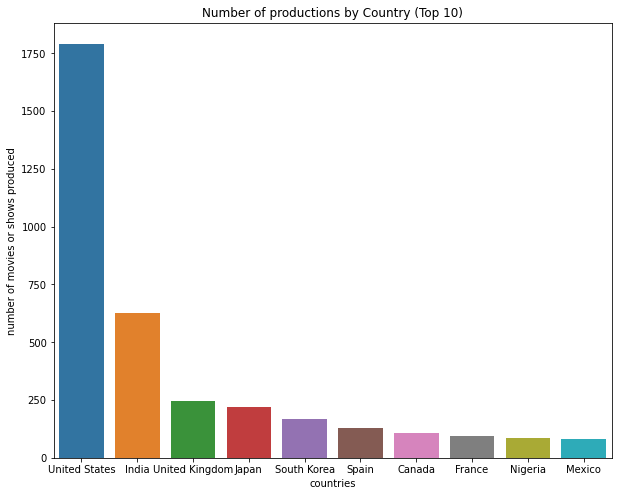

In [ ]:
countries = df['Production Country'].value_counts().head(10)
plt.figure(figsize = (10,8))
plt.title('Number of productions by Country (Top 10)')
plt.xlabel('countries')
plt.ylabel('number of movies or shows produced')
sns.barplot(x = countries.index, y =  countries.values )